# **House Price Study**

## Objectives

* 1 - The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* inputs/datasets/collection/HousePricesRecords.csv

## Outputs

* Generate code to answer business query number 1 and use it to help build the streamlit app dashboard.



---

# Change working directory

We need to change the working directory from its current folder to its parent folder

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-analysis'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/collection/HousePricesRecords.csv")
    )
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500


---

# Converting Datatypes

We want to look at the data to see what the correclation levels are. To do this we need to convert the categorical datatypes to an int. Firstly lets check the datatypes.

In [5]:
df.dtypes

1stFlrSF          int64
2ndFlrSF        float64
BedroomAbvGr    float64
BsmtExposure     object
BsmtFinSF1        int64
BsmtFinType1     object
BsmtUnfSF         int64
GarageArea        int64
GarageFinish     object
GarageYrBlt     float64
GrLivArea         int64
KitchenQual      object
LotArea           int64
LotFrontage     float64
MasVnrArea      float64
OpenPorchSF       int64
OverallCond       int64
OverallQual       int64
TotalBsmtSF       int64
YearBuilt         int64
YearRemodAdd      int64
SalePrice         int64
dtype: object

As we can see. BsmtExposure, BsmtFinType1, GarageFinish, KitchenQual are all objects. These need to be converted into integers. We need to find the unique variables for each datapoint and convert them to a number.

### BsmtExposure

In [6]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'None'], dtype=object)

In [7]:
df['BsmtExposure'] = df['BsmtExposure'].replace({"No":0, "None":1, "Gd":2, "Mn":3, "Av":4})

In [8]:
df['BsmtExposure'].dtype

dtype('int64')

### BsmtFinType1

In [9]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', nan, 'BLQ', 'None', 'LwQ'],
      dtype=object)

In [10]:
df['BsmtFinType1'] = df['BsmtFinType1'].replace({"None":0, "GLQ":1, "ALQ":2, "Unf":3, "Rec":4, "Rec":5, "LwQ":6, "BLQ":7})

In [11]:
df['BsmtFinType1'].dtype

dtype('float64')

As this has popped up as a float despite having only whole numbers, likely due to the nan entries. We will fill nan to be a seperate number for now.

In [12]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(8.0).astype(int)

In [13]:
df['BsmtFinType1'].dtype

dtype('int64')

### GarageFinish

In [14]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', nan, 'Fin', 'None'], dtype=object)

As we can see another nan entry in this column, then we can skip the first dtype check that was done with the previous column.

In [15]:
df['GarageFinish'] = df['GarageFinish'].replace({"None":0, "Unf":1, "RFn":2, "Fin":3})

In [16]:
df['GarageFinish'] = df['GarageFinish'].fillna(4.0).astype(int)

In [17]:
df['GarageFinish'].dtype

dtype('int64')

### KitchenQual

In [18]:
df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [19]:
df['KitchenQual'] = df['KitchenQual'].replace({"Gd":0, "TA":1, "Ex":2, "Fa":3})

In [20]:
df['KitchenQual'].dtype

dtype('int64')

---

# Correlation Study

Now that the datatypes are all numeric, we can try and see what the strongest correlating columns are. We know that SalePrice is our target.
We use both spearman and pearson methods to help investigate the top 10 correlations.

We know this command returns a pandas series and the first item is the correlation betweeSalePricern anSalePricern, which happens to be 1, so we exclude that with [1:]
We sort values considering the absolute value, by setting key=abs

In [21]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
GarageFinish    0.536228
OpenPorchSF     0.477561
Name: SalePrice, dtype: float64

In [22]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
GarageFinish    0.428305
Name: SalePrice, dtype: float64

As we can see the top 10's range from moderate to strong positive correcalations, with OverallQual being very strong in spearman and just shy of very strong on pearson. Let's gather the top correlators from this and study it's assosiated variables.

In [23]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

We are going to study these columns to see if these features have an effect on the SalePrice.

In [24]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

# EDA on selected variables

In [25]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500


## Variables distribution by SalePrice

Let's start with a scatter plot to see if there's some noticable trending in the data.

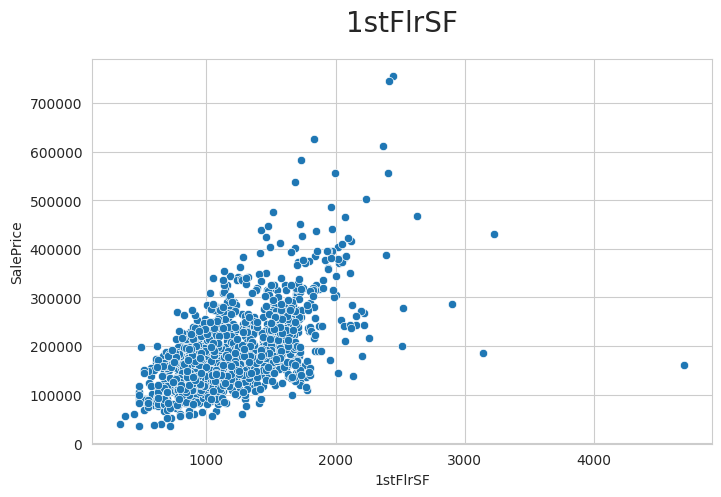

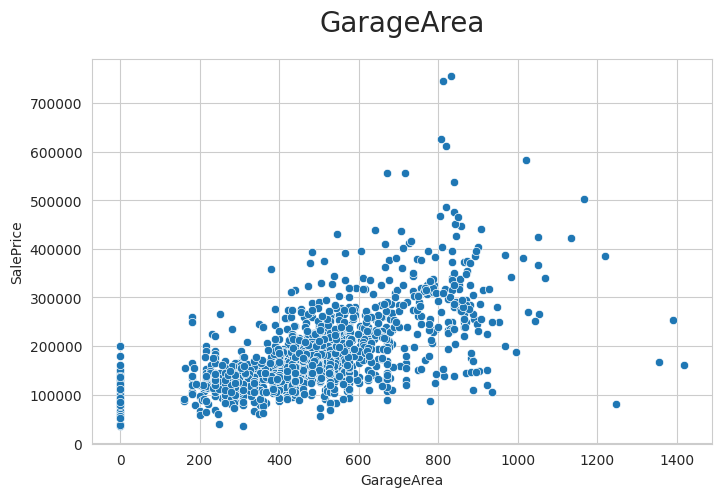

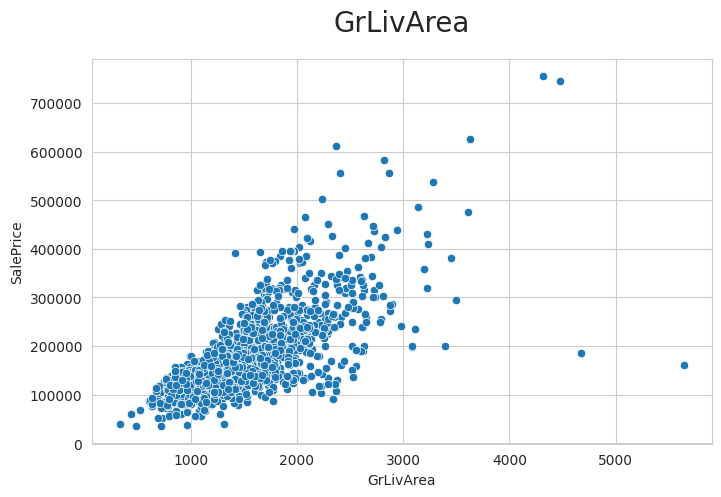

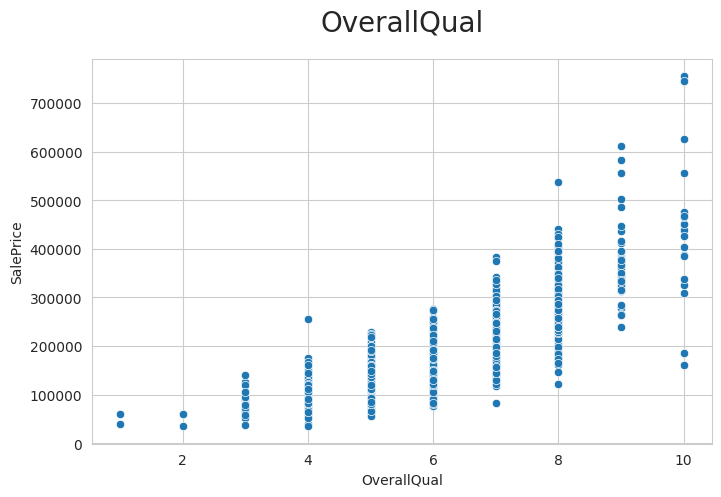

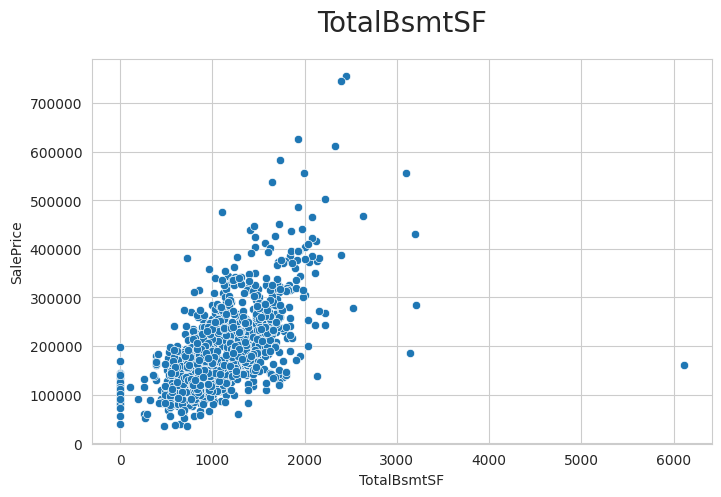

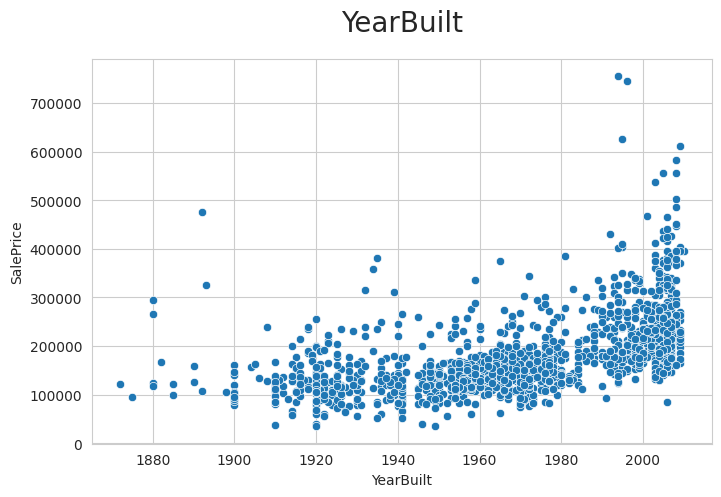

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_scatter(df, col, target_var):
    plt.figure(figsize=(8, 5))
    # sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    sns.scatterplot(data=df, x=col, y=target_var)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    plot_scatter(df_eda, col, target_var)
    print("\n\n")

At a glance we can see that, while there is some noticable trending on some vatriables, it is quite tough to see just how much the variable is affecting the SalePrice. We'll see if a histogram will provide us with some more accurate insight.

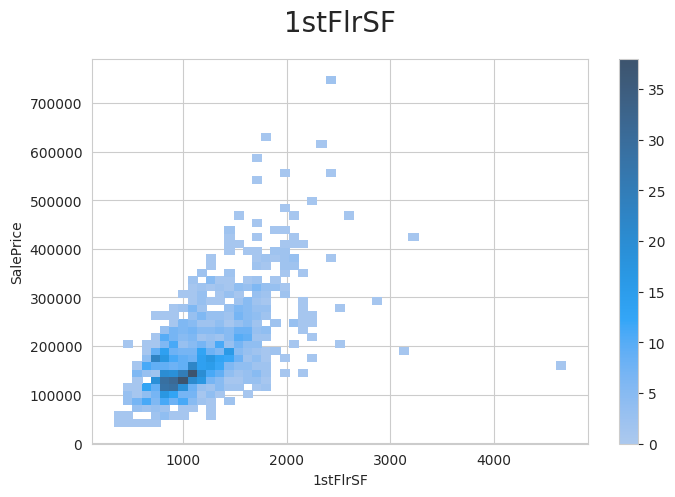

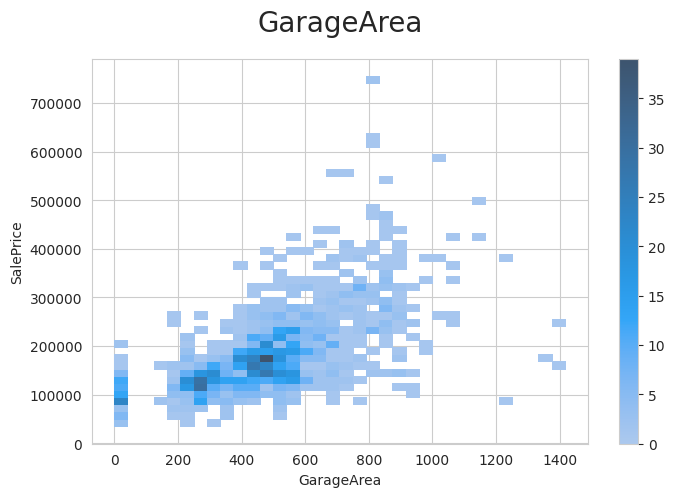

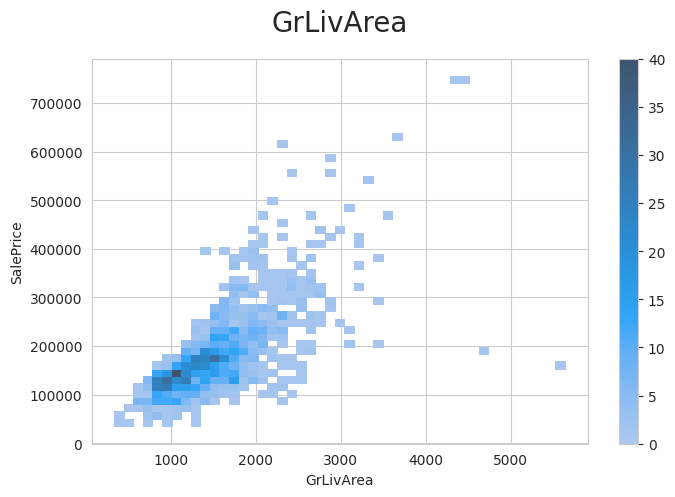

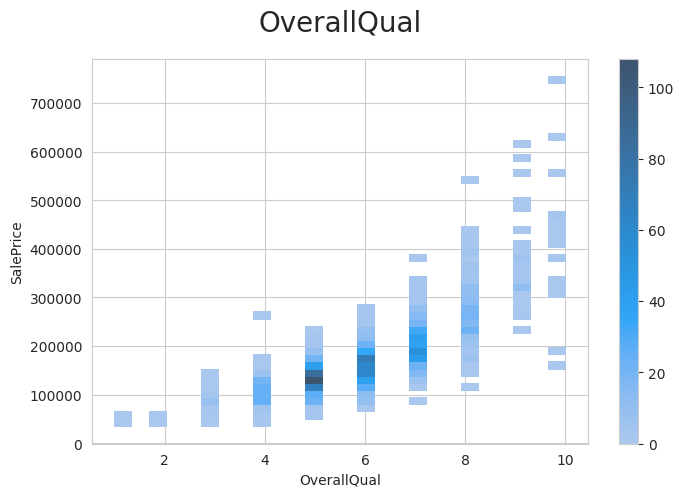

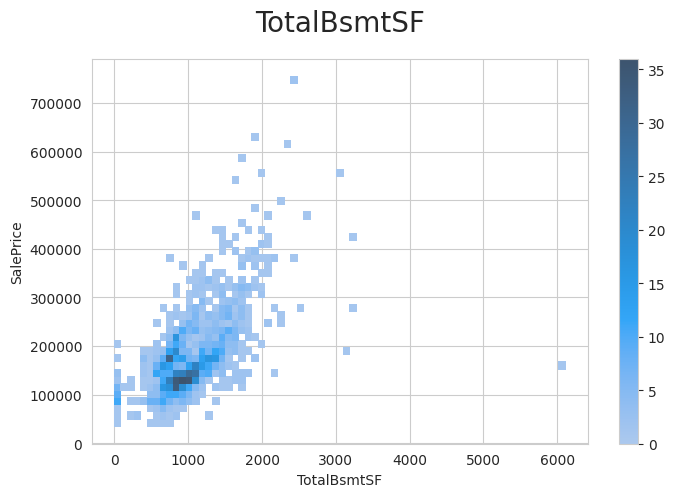

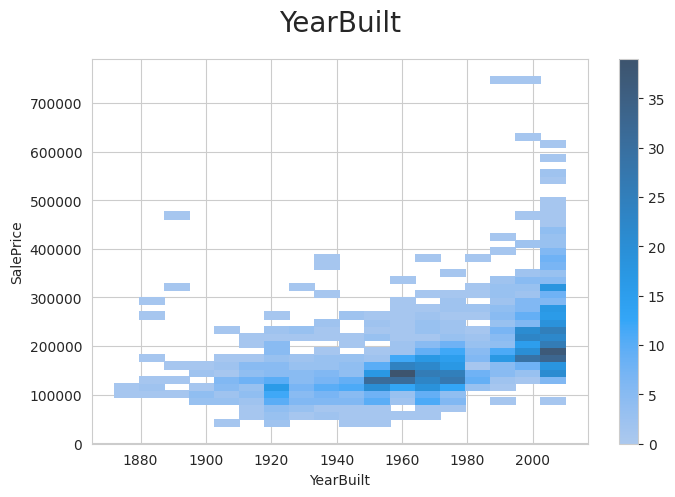

In [33]:
def plot_histo(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, y=target_var, cbar=True)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    plot_histo(df_eda, col, target_var)
    print("\n\n")

The histograms do help us see a little clearer what variables have a stronger trend on the SalePrice. Let's also try a box plot to see if anything can be gleamed from the data. This will likely only give insight to the variables with smaller ranges of numbers, such as OverallQual being 1-10, but we will run it for all of the variables anyway just to see.

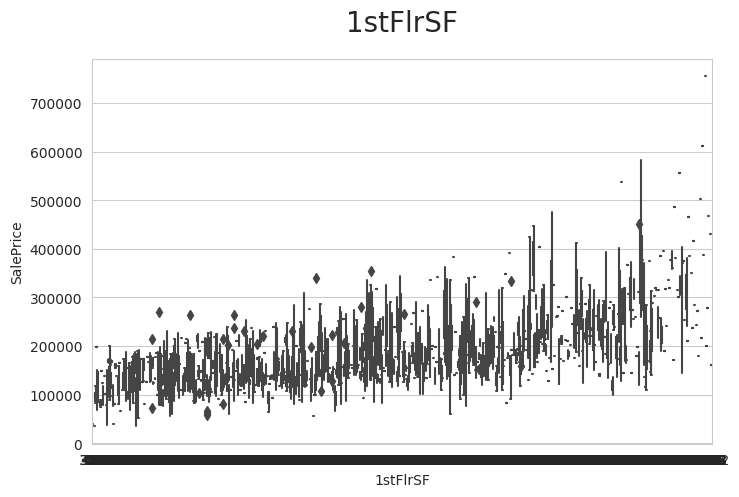

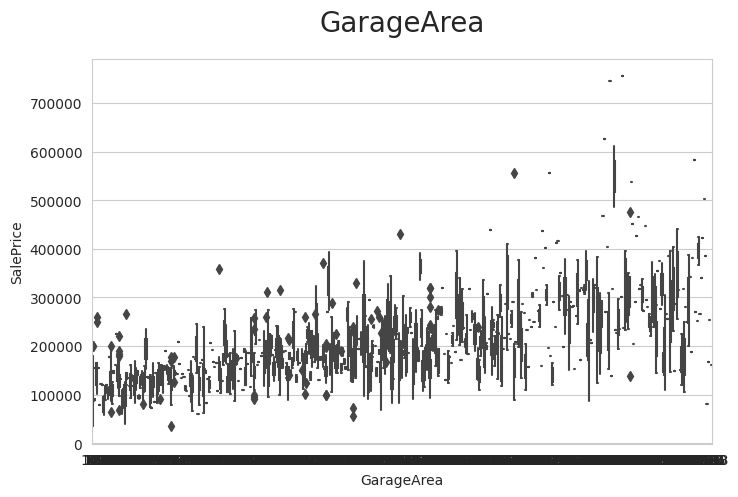

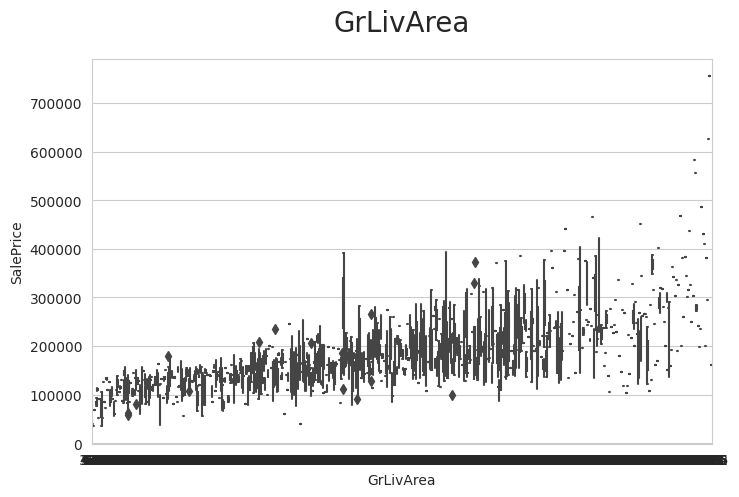

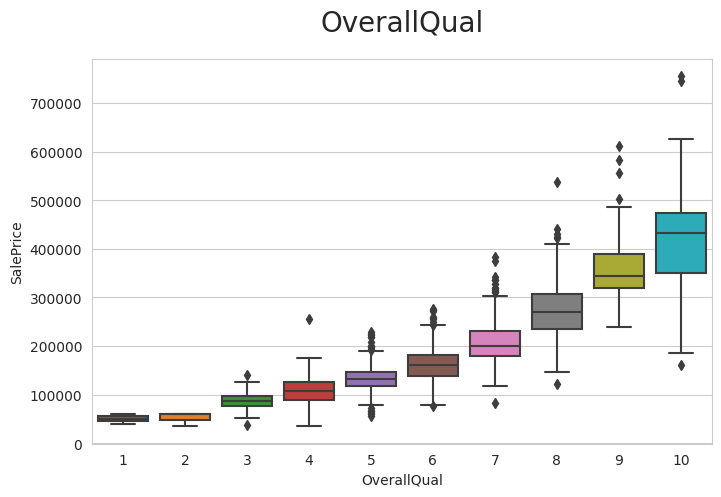

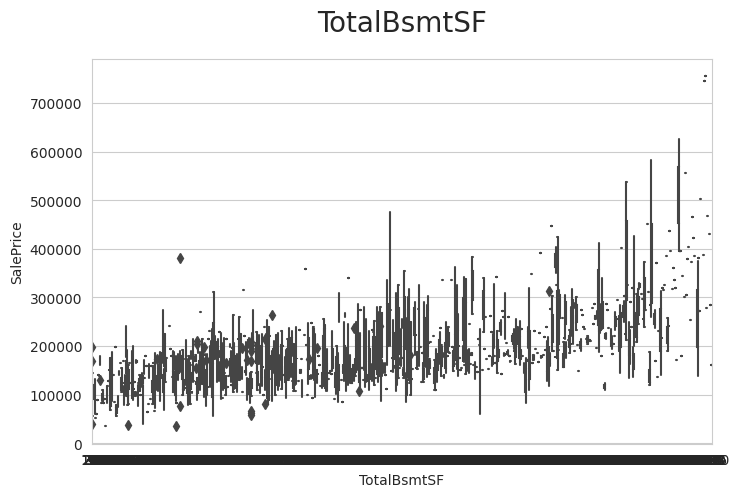

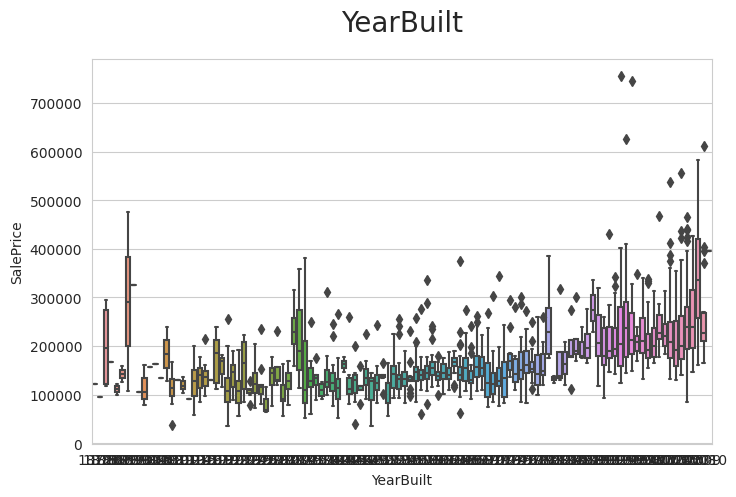

In [35]:
def plot_box(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, y=target_var)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    plot_box(df_eda, col, target_var)
    print("\n\n")

And again we can see some clearer results, especially for OverallQual with these plots. One final thing I want to look at is a regression plot.~

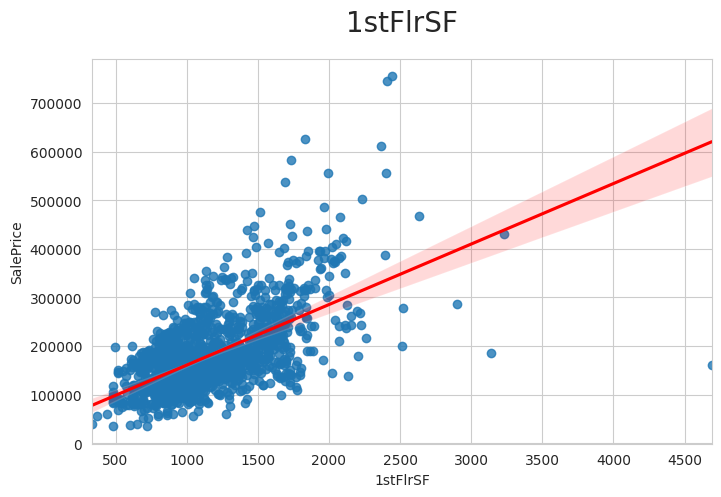

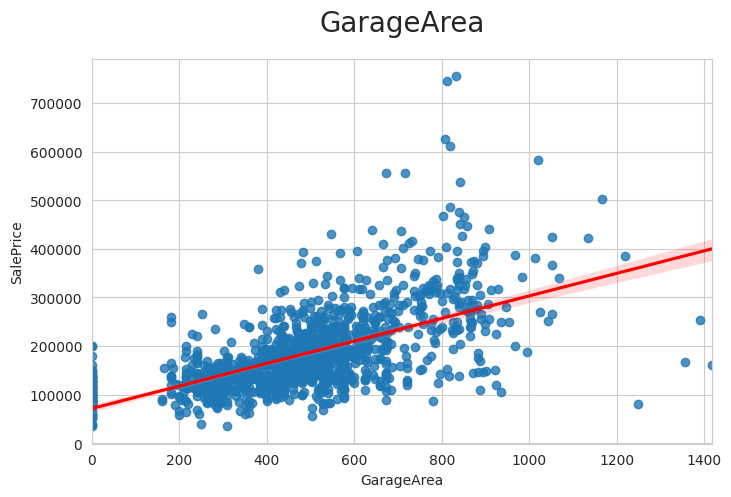

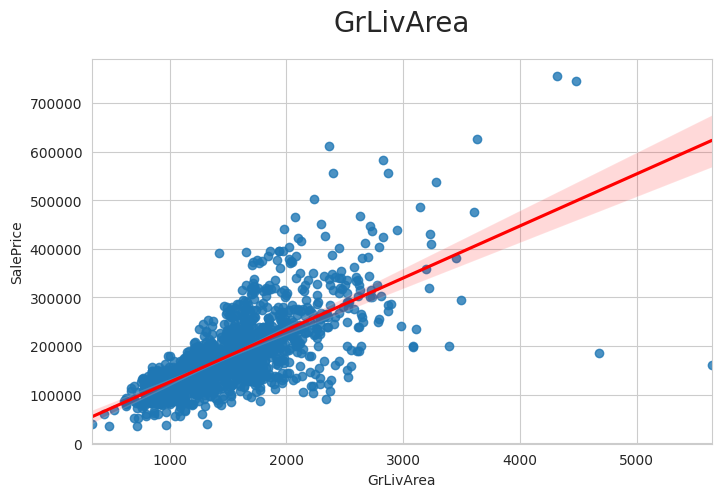

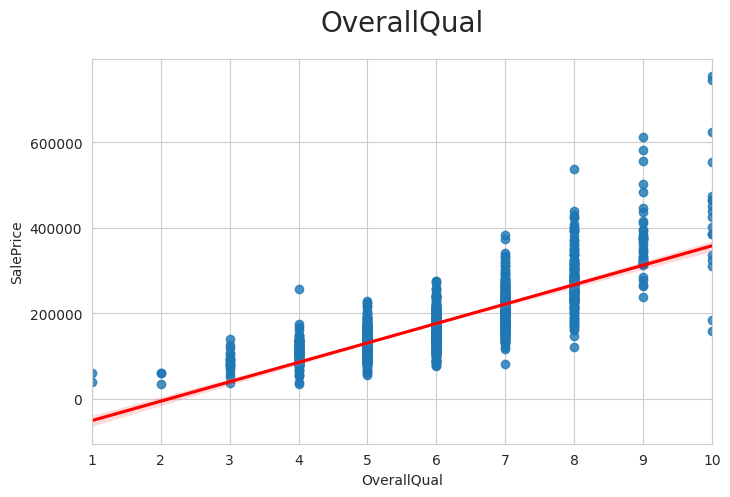

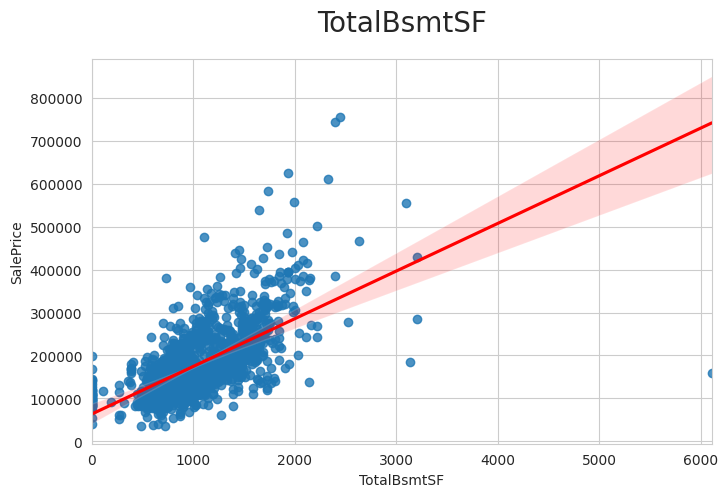

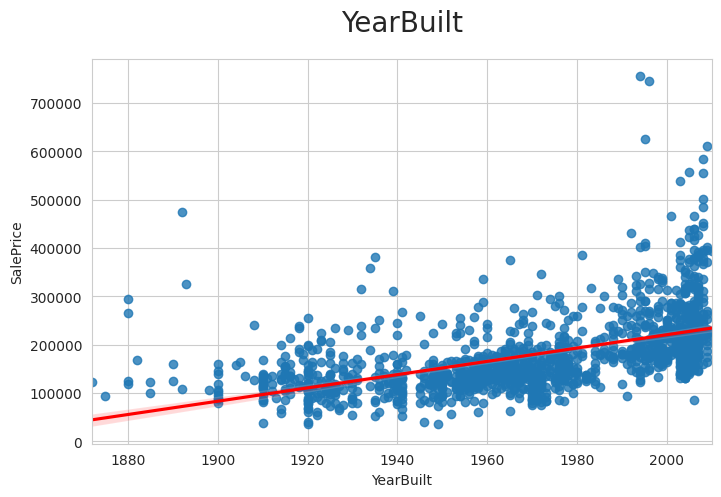

In [40]:
def plot_regress(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=col, y=target_var,
                line_kws = {"color": "red"})
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    plot_regress(df_eda, col, target_var)
    print("\n\n")

---

# Conclusions and next steps

Based on the above sets of visuals I believe the following:

* 1StFlrSF

---

# Push files to repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
